In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import matplotlib.pyplot as plt
import data_tools
import lstm

In [2]:
model = lstm.bmi_LSTM()
model.read_cfg_file('lstm-info.cfg')

In [3]:
model.initialize()

In [4]:
model.input_tensor.shape

torch.Size([2492, 11])

In [9]:
model.update()

updating for t:  1776
start_this_seq 1775
for time: 1777 lstm output: 13.18190545875549


In [ ]:
model.input_tensor.shape

In [10]:
model.update_until(model.iend)

updating for t:  1777
start_this_seq 1776
for time: 1778 lstm output: 12.08279310799716
updating for t:  1778
start_this_seq 1777
for time: 1779 lstm output: 11.01406926653117
updating for t:  1779
start_this_seq 1778
for time: 1780 lstm output: 9.938357575039204
updating for t:  1780
start_this_seq 1779
for time: 1781 lstm output: 9.656570041522016
updating for t:  1781
start_this_seq 1780
for time: 1782 lstm output: 9.124591010730807
updating for t:  1782
start_this_seq 1781
for time: 1783 lstm output: 8.506807724689041
updating for t:  1783
start_this_seq 1782
for time: 1784 lstm output: 8.548604331064814
updating for t:  1784
start_this_seq 1783
for time: 1785 lstm output: 8.186302135241505
updating for t:  1785
start_this_seq 1784
for time: 1786 lstm output: 8.276850115088866
updating for t:  1786
start_this_seq 1785
for time: 1787 lstm output: 8.139111173309121
updating for t:  1787
start_this_seq 1786
for time: 1788 lstm output: 8.249624701507917
updating for t:  1788
start_this

for time: 2081 lstm output: 1.6017367037959203
updating for t:  2081
start_this_seq 2080
for time: 2082 lstm output: 2.926884498989923
updating for t:  2082
start_this_seq 2081
for time: 2083 lstm output: 2.2631416711939423
updating for t:  2083
start_this_seq 2082
for time: 2084 lstm output: 2.6808118265207983
updating for t:  2084
start_this_seq 2083
for time: 2085 lstm output: 2.1901846204887705
updating for t:  2085
start_this_seq 2084
for time: 2086 lstm output: 2.6941460853157606
updating for t:  2086
start_this_seq 2085
for time: 2087 lstm output: 2.8203427603508655
updating for t:  2087
start_this_seq 2086
for time: 2088 lstm output: 2.5586678104302685
updating for t:  2088
start_this_seq 2087
for time: 2089 lstm output: 2.7583490251125373
updating for t:  2089
start_this_seq 2088
for time: 2090 lstm output: 2.7403169902348843
updating for t:  2090
start_this_seq 2089
for time: 2091 lstm output: 2.933949542519604
updating for t:  2091
start_this_seq 2090
for time: 2092 lstm out

for time: 2388 lstm output: 25.31565455996005
updating for t:  2388
start_this_seq 2387
for time: 2389 lstm output: 24.055784899793014
updating for t:  2389
start_this_seq 2388
for time: 2390 lstm output: 22.678996488560134
updating for t:  2390
start_this_seq 2389
for time: 2391 lstm output: 21.64031562356037
updating for t:  2391
start_this_seq 2390
for time: 2392 lstm output: 20.347432874974988
updating for t:  2392
start_this_seq 2391
for time: 2393 lstm output: 19.42434560589411
updating for t:  2393
start_this_seq 2392
for time: 2394 lstm output: 18.497598997149446
updating for t:  2394
start_this_seq 2393
for time: 2395 lstm output: 18.116178543574904
updating for t:  2395
start_this_seq 2394
for time: 2396 lstm output: 17.29373873774295
updating for t:  2396
start_this_seq 2395
for time: 2397 lstm output: 16.83003092818789
updating for t:  2397
start_this_seq 2396
for time: 2398 lstm output: 16.374375136245614
updating for t:  2398
start_this_seq 2397
for time: 2399 lstm output

In [11]:
print(np.array(model.obs).shape)
print(len(model.output_list))

(720,)
720


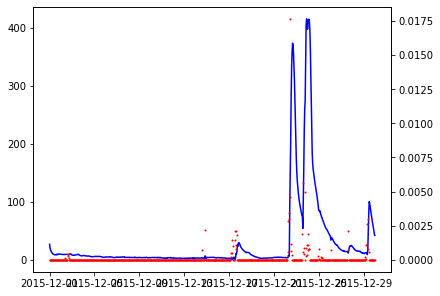

In [12]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = pd.date_range(model.test_date_start, model.test_date_end, freq="H")
ax.plot(xdata, model.output_list[:xdata.shape[0]], label='lstm output', c='b')
ax2=ax.twinx()
ax2.scatter(xdata,model.forcings['RAINRATE'].values[-721:-24], s=1, c='r')